# Classroom 3 - Basic machine learning with ```Pytorch```

The first thing we need to do for this workshops is install both ```pytorch``` and ```scikit-learn```, along with some other packages we need for this week.

```
pip install --upgrade pip
pip install torch sklearn matplotlib pandas
```

In [2]:
!pip install --upgrade pip
!pip install torch sklearn matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.9 MB/s eta 0:00:0000:010:01
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.4/776.4 MB 4.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=72be7e789be17702cbe27155cb35bda03e804f35b0c6894e93232bcd0c41ec7e
  Stored in directory: /home/coder/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


__Load packages__

In [3]:
# system tools
import os

# pytorch
import torch
from torch import nn

# pandas
import pandas as pd

# scikit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# matplotlib
import matplotlib.pyplot as plt

__Creating a tensor__

In [4]:
x_tensor = torch.tensor([[1., -1.], 
                         [1., -1.]])
print(type(x_tensor))

<class 'torch.Tensor'>


In [5]:
print(x_tensor)

tensor([[ 1., -1.],
        [ 1., -1.]])


__Tensor to numpy arrray__

In [6]:
# tensor to numpy
x_array = x_tensor.numpy()
print(type(x_array))

<class 'numpy.ndarray'>


In [7]:
print(x_array)

[[ 1. -1.]
 [ 1. -1.]]


__And back again__

In [8]:
# numpy to tensor
x_tensor2 =torch.tensor(x_array)
print(type(x_tensor2))

<class 'torch.Tensor'>


In [9]:
# check for identity
print(x_tensor2 == x_tensor)

tensor([[True, True],
        [True, True]])


## Finding the minimum of an polynomial

We begin here by creating an initial value for ```x``` and defining the function ```y```.

The goal is to find the _minimum_ value of y, i.e. in this case the turning point of the function.


In [10]:
x = torch.tensor([3.], #Dette er en tansor af rank 3
                 requires_grad=True) #Dette gør at den tracker the gradings; dvs. vi kan se dem senere

In [11]:
y = x**2 - 3*x + 2
print(y) #Dette er en tensor af rank 2

tensor([2.], grad_fn=<AddBackward0>)


__Create SGD optimizer__

In [12]:
#Stochastic Grading Descent
optimizer = torch.optim.SGD([x],     # starting value
                            lr=0.01) # learning rate; det er hvor stor the steps er når man går ned i en dal, der findes andre der kan starte stort og derefter tage små skridt


__Calcuate the gradient__

We first run a _backwards pass_ which computes the gradient of the function ```y``` for given value ```x```

In [13]:
y.backward()

In [14]:
print(x.grad) # examine

tensor([3.])


__Make a step in the right direction__

In [15]:
# step in the direction to minimize y
optimizer.step()

In [16]:
# set the gradient to zero. (This is a bit wierd but required), noget blir nulstillet
optimizer.zero_grad()

In [17]:
# we see that x have improved (minimum is 1.5 so moving in the right direction)
print(x)
# we see that the gradient is set to zero
print(x.grad) #Gradient of the slope for x; i.e. the magnitude of the slope; we want it to be zero because then we are at the bottom of the valley
#The gradient is not actually zero, we have just set it to be for practical reasons

tensor([2.9700], requires_grad=True)
tensor([0.])


__Run this for 1000 steps__

In [20]:
for i in range(1000):
    #print(x)

    # forward pass / or just calculate the outcome
    y = x**2 - 3*x + 2

    # backward pass on the thing we want to minimize
    y.backward()

    # take a step in the "minimize direction"
    optimizer.step()

    # zero the gradient
    optimizer.zero_grad()

__Print the local minimum__

What we see is that using stochastic gradient descent with a defined starting point allows us to correctly calculate the local minimum of the function.

In [21]:
print(x)

tensor([1.5000], requires_grad=True)


### Bonus task

- Try and define some functions of your own and see if you can find the minimum. (There are tools online where you can check what the actual minimum is, to see if the algorithm gets it right!)

## Linear regression

The same general procedure can be used when performing linear regression on data points. 

In this example, we're using ```scikit-learn``` to artificially generate some data points for us.

In [22]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100,    # number of individual data points
                                            n_features=1,     # each data point represents a single feature
                                            noise=20,         # technically, SD of gaussian noise applied to the output
                                            random_state=4)   # a random state for reproducibility; de gør at det jo ikke er tilfældigt men det samme hver gang - det er et seed

__Plot the data__

Note that here we're using ```matplotlib``` the lazy way, instead of explicitly defining ```fig, ax```. This is fine for experimental notebooks, but don't do it in your codebases!

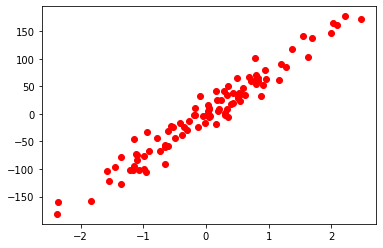

In [24]:
# plot the sample
plt.plot(X_numpy, y_numpy, 'ro')
plt.show()

#I Advanced Computing Workshop har man lært at gøre det med "fig, ax" fordi det her ikke anbefales

__Convert data to tensors__

In [26]:
# cast to float Tensor - a pytorch float type
X = torch.tensor(X_numpy, dtype=torch.float)
y = torch.tensor(y_numpy, dtype=torch.float)

__Check the shapes__

In [28]:
print(X.shape)
print(y.shape)

#Problem: they don't have the same dimensionality. X is a rank one tensor, therefor y must be reshaped

torch.Size([100, 1])
torch.Size([100])


__Reshape ```y```__

In [29]:
y = y.view(y.shape[0], 1) # view is similar to reshape it simply sets the desired shape to (100, 1)
print(y.shape)

torch.Size([100, 1])


__Check datatypes__

In [30]:
print(y.dtype)
print(x.dtype)

torch.float32
torch.float32


__Get number of samples and features__

We'll use this information below when calculating loss function etc.

In [31]:
n_samples, n_features = X.shape
print(X.shape)

torch.Size([100, 1])


__Initialize a linear model__

In [32]:
# Linear model f = wx + b
input_size = n_features 
output_size = 1

# create a weight and biases (betas and intercept) initialized 'randomly'
model = nn.Linear(input_size, output_size)

__Set learning rate, check parameters__

In [33]:
learning_rate = 0.01 # feel free to change this
print(list(model.parameters())) # only two parameters a beta and an intercept

[Parameter containing:
tensor([[-0.0783]], requires_grad=True), Parameter containing:
tensor([-0.7766], requires_grad=True)]


__Define a loss function and an optimization algorithm__

In [34]:
criterion = nn.MSELoss() # criteroon er et begreb man bruger

In [35]:
optimizer = torch.optim.SGD(model.parameters(), # parameters to optimize
                            lr=learning_rate    # the speed in which we optimize them  / how fast the model learns (think step size) 
                            ) 

__Run for 100 epochs__

In [36]:
epochs = 100
for epoch in range(epochs):
    # Forward pass / calc predicted y
    # a + b*X
    y_predicted = model(X)
    
    # calucate loss / MSE; this evaluates the loss function
    loss = criterion(y_predicted, y)
    
    # Backward pass / gradient and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    # some print to see that it is running
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4068.4990
epoch: 20, loss = 2865.9275
epoch: 30, loss = 2046.4844
epoch: 40, loss = 1487.9844
epoch: 50, loss = 1107.2505
epoch: 60, loss = 847.6457
epoch: 70, loss = 670.5963
epoch: 80, loss = 549.8247
epoch: 90, loss = 467.4259
epoch: 100, loss = 411.1964


__Get predicted values__

In [37]:
# Plot
predicted = model(X).detach().numpy()

__Plot results__

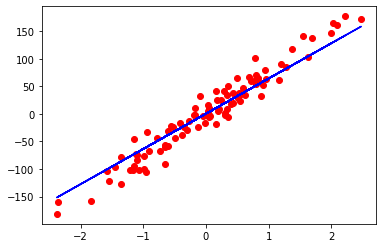

In [38]:
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')

## Logistic Regression Classifier with text data

So far we haven't actually looked at any text data! 

In the following section, we're going to use some real world text data in a binary classification problem. We're going to use document vectorization techniques we saw in the lecutre, and see how to build a Logistic Regression classifier with ```pytorch```.

In [ ]:
filepath = os.path.join()

In [ ]:
data = pd.read_csv(filepath)

__Creating train/test splits__

A common practice when building ML/DL models is to use explicitly defined subsets of data for different tasks - [training vs testing](https://upload.wikimedia.org/wikipedia/commons/b/bb/ML_dataset_training_validation_test_sets.png), for example. This is slightly different from how we work when doing statistical modelling (in most cases).

```scikit-learn``` has a simple tool that allows us to quickly split our dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data["text"], data["label"], 
                                                    test_size=0.2, 
                                                    random_state=42)

__Creating a document vectorizer__

There are a lot of different parameters here that we're not going to look at but please do [check them out in the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

The exact same approach can be applied using TfidfVectorizer() instead of CountVectorizer() - [give it a try](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)!

__Initialize vectorizer__

In [ ]:
vectorizer = CountVectorizer()
# vectorizer = TfidfVectorizer()

__Fit to the training data__

In [ ]:
# vectorized training data
X_train_vect = vectorizer.fit_transform(X_train)

# vectorized test data
X_test_vect = vectorizer.transform(X_test)

__Convert to tensors__

In [ ]:
# vectorized training data
X_train_vect = torch.tensor(X_train_vect.toarray(), dtype=torch.float)

# vectorized test data
X_test_vect = torch.tensor(X_test_vect.toarray(), dtype=torch.float)

__Convert labels__

In [ ]:
# training labels
y_train = torch.tensor(list(y_train), dtype=torch.float)
# test labels
y_test = torch.tensor(list(y_test), dtype=torch.float)

In [ ]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

__Initialization parameters for Logistic Regression__

In [ ]:
n_samples, n_features = X_train_vect.shape
input_size = n_features 
output_size = 1

__Creating the model__

Notice here that we are still using a Linear layer, but this time we have a different loss function - [Binary Cross Entropy loss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html).

In [ ]:
# create a weight and biases (betas and intercept) initialized 'randomly'
model = nn.Linear(input_size, output_size)
learning_rate = 0.01 # feel free to change this

In [ ]:
print(list(model.parameters()))

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), # parameters to optimize
                            lr=learning_rate    # the speed in which we optimize them  / how fast the model learns (think step size) 
                            ) 

__Run the model for 100 epochs__

In [ ]:
epochs = 100
for epoch in range(epochs):
    # Forward pass / calc predicted y
    # a + b*X
    m = nn.Sigmoid()
    y_predicted = model(X_train_vect)

    # calucate loss / MSE
    loss = criterion(m(y_predicted.round()), y_train)

    
    # Backward pass / gradient and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    # some print to see that it is running
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

__Check performance against test data__

We need to explicitly use ```torch.no_grad()``` here to make sure that we freeze the gradients and don't accidently update them during inferencing.

In [ ]:
with torch.no_grad():
    y_pred=model(X_test_vect)
    y_pred_class=y_pred.round()
    correct = sum(y_pred_class==y_test)
    print((correct/X_test.shape[0])*100)

### Bonus tasks

- Can you write your own version of ```CountVectorizer()```? In other words, a function that takes a corpus of documents and creates a bag-of-words representation for every document?
- What about ```TfidfVectorizer()```? Make sure to look over the formulae in the slides from Wednesday, and also the Jurafsky and Martin book.